In [1]:
import numpy as np
import pandas as pd

import matplotlib as plt

In [2]:
food = pd.read_csv("C:/Users/ssama/OneDrive/Desktop/samarth/ML Projects/Food_Recommendor_system/indian_food.csv")

In [26]:
food.head()

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
0,Balu shahi,"Maida flour, yogurt, oil, sugar",vegetarian,45,25,sweet,dessert,West Bengal,East
1,Boondi,"Gram flour, ghee, sugar",vegetarian,80,30,sweet,dessert,Rajasthan,West
2,Gajar ka halwa,"Carrots, milk, sugar, ghee, cashews, raisins",vegetarian,15,60,sweet,dessert,Punjab,North
3,Ghevar,"Flour, ghee, kewra, milk, clarified butter, su...",vegetarian,15,30,sweet,dessert,Rajasthan,West
4,Gulab jamun,"Milk powder, plain flour, baking powder, ghee,...",vegetarian,15,40,sweet,dessert,West Bengal,East


## Dropping Unecessary columns

In [4]:
food_1 = food.drop(['prep_time','cook_time'], axis =1)

In [5]:
food_1.head(16)

,name,ingredients,diet,flavor_profile,course,state,region
0,Balu shahi,"Maida flour, yogurt, oil, sugar",vegetarian,sweet,dessert,West Bengal,East
1,Boondi,"Gram flour, ghee, sugar",vegetarian,sweet,dessert,Rajasthan,West
2,Gajar ka halwa,"Carrots, milk, sugar, ghee, cashews, raisins",vegetarian,sweet,dessert,Punjab,North
3,Ghevar,"Flour, ghee, kewra, milk, clarified butter, su...",vegetarian,sweet,dessert,Rajasthan,West
4,Gulab jamun,"Milk powder, plain flour, baking powder, ghee,...",vegetarian,sweet,dessert,West Bengal,East
5,Imarti,"Sugar syrup, lentil flour",vegetarian,sweet,dessert,West Bengal,East
6,Jalebi,"Maida, corn flour, baking soda, vinegar, curd,...",vegetarian,sweet,dessert,Uttar Pradesh,North
7,Kaju katli,"Cashews, ghee, cardamom, sugar",vegetarian,sweet,dessert,-1,-1
8,Kalakand,"Milk, cottage cheese, sugar",vegetarian,sweet,dessert,West Bengal,East
9,Kheer,"Milk, rice, sugar, dried fruits",vegetarian,sweet,dessert,-1,-1


In [6]:
food_2 = food_1.drop(['state'], axis = 1)

In [7]:
food_2.head()

,name,ingredients,diet,flavor_profile,course,region
0,Balu shahi,"Maida flour, yogurt, oil, sugar",vegetarian,sweet,dessert,East
1,Boondi,"Gram flour, ghee, sugar",vegetarian,sweet,dessert,West
2,Gajar ka halwa,"Carrots, milk, sugar, ghee, cashews, raisins",vegetarian,sweet,dessert,North
3,Ghevar,"Flour, ghee, kewra, milk, clarified butter, su...",vegetarian,sweet,dessert,West
4,Gulab jamun,"Milk powder, plain flour, baking powder, ghee,...",vegetarian,sweet,dessert,East


## Handling Null Values

In [8]:
food_2.isna().sum()

name              0
ingredients       0
diet              0
flavor_profile    0
course            0
region            1
dtype: int64

In [9]:
food_2[food_2['region'].isnull()]

,name,ingredients,diet,flavor_profile,course,region
110,Panjeeri,"Whole wheat flour, musk melon seeds, poppy see...",vegetarian,sweet,dessert,NaN


In [10]:
food_2['region'].fillna('North', inplace = True)

## Exploratory Data Analysis

In [11]:
food_2.head()

,name,ingredients,diet,flavor_profile,course,region
0,Balu shahi,"Maida flour, yogurt, oil, sugar",vegetarian,sweet,dessert,East
1,Boondi,"Gram flour, ghee, sugar",vegetarian,sweet,dessert,West
2,Gajar ka halwa,"Carrots, milk, sugar, ghee, cashews, raisins",vegetarian,sweet,dessert,North
3,Ghevar,"Flour, ghee, kewra, milk, clarified butter, su...",vegetarian,sweet,dessert,West
4,Gulab jamun,"Milk powder, plain flour, baking powder, ghee,...",vegetarian,sweet,dessert,East


In [12]:
food_2['diet'].value_counts()

diet
vegetarian        226
non vegetarian     29
Name: count, dtype: int64

In [13]:
import matplotlib.pyplot as plt

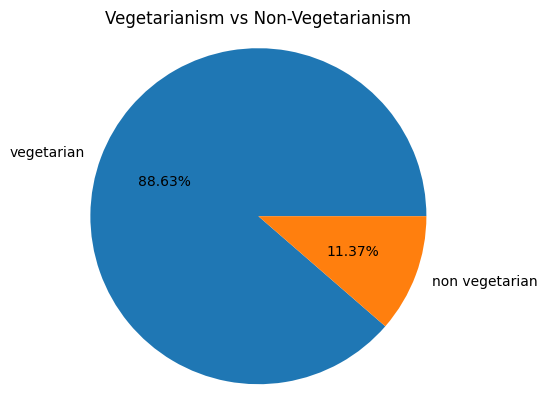

In [14]:
region_counts = food_2['diet'].value_counts()
labels = region_counts.index.tolist()  
values = region_counts.tolist()
plt.pie(values, labels=labels, autopct='%0.2f%%')
plt.axis('equal')  
plt.title('Vegetarianism vs Non-Vegetarianism')
plt.show()


## Joining all the features of food items and making them one as "Tags"

In [15]:
food_2['tags'] = food_2['ingredients'] + ' ' + food_2['diet'] + ' ' + food_2['flavor_profile'] + ' ' + food_2['course'] + ' ' + food_2['region']
food_2['tags'] = food_2['tags'].str.strip().str.lower()



In [16]:
food_2.head()

,name,ingredients,diet,flavor_profile,course,region,tags
0,Balu shahi,"Maida flour, yogurt, oil, sugar",vegetarian,sweet,dessert,East,"maida flour, yogurt, oil, sugar vegetarian swe..."
1,Boondi,"Gram flour, ghee, sugar",vegetarian,sweet,dessert,West,"gram flour, ghee, sugar vegetarian sweet desse..."
2,Gajar ka halwa,"Carrots, milk, sugar, ghee, cashews, raisins",vegetarian,sweet,dessert,North,"carrots, milk, sugar, ghee, cashews, raisins v..."
3,Ghevar,"Flour, ghee, kewra, milk, clarified butter, su...",vegetarian,sweet,dessert,West,"flour, ghee, kewra, milk, clarified butter, su..."
4,Gulab jamun,"Milk powder, plain flour, baking powder, ghee,...",vegetarian,sweet,dessert,East,"milk powder, plain flour, baking powder, ghee,..."


In [17]:
food_3 = food_2[['name', 'tags']]


In [18]:
food_3.head()

,name,tags
0,Balu shahi,"maida flour, yogurt, oil, sugar vegetarian swe..."
1,Boondi,"gram flour, ghee, sugar vegetarian sweet desse..."
2,Gajar ka halwa,"carrots, milk, sugar, ghee, cashews, raisins v..."
3,Ghevar,"flour, ghee, kewra, milk, clarified butter, su..."
4,Gulab jamun,"milk powder, plain flour, baking powder, ghee,..."


## Applying Vectorisation

In [19]:
from sklearn.feature_extraction.text import CountVectorizer


In [20]:
cv = CountVectorizer(max_features = 5000, stop_words = 'english')

In [21]:
vectors = cv.fit_transform(food_3['tags']).toarray()
cv.get_feature_names_out()

array(['acid', 'almond', 'almonds', 'aloo', 'alum', 'amaranth', 'amchur',
       'anise', 'apricots', 'arbi', 'arhar', 'arrowroot', 'atta',
       'avocado', 'axone', 'baby', 'badam', 'bags', 'baingan', 'baking',
       'bamboo', 'banana', 'basmati', 'bay', 'bean', 'beans', 'beaten',
       'beef', 'beetroot', 'bell', 'bengal', 'besan', 'bhaji', 'bhatura',
       'bhuna', 'biryani', 'bitter', 'black', 'blend', 'boiled', 'bombay',
       'boondi', 'bottle', 'bread', 'breasts', 'brinjal', 'brown',
       'buffalo', 'butter', 'cabbage', 'canned', 'capsicum', 'cardamom',
       'carrot', 'carrots', 'cashew', 'cashews', 'cauliflower', 'central',
       'chana', 'cheese', 'chenna', 'chhena', 'chia', 'chicken',
       'chickpea', 'chickpeas', 'chili', 'chilies', 'chilli', 'chillies',
       'chole', 'chopped', 'chunks', 'chutney', 'cilantro', 'cinnamon',
       'citric', 'clarified', 'coconut', 'coloring', 'condensed',
       'cooked', 'coriander', 'corn', 'cottage', 'course', 'cream',
      

## Finding cosine distance

In [22]:
from sklearn.metrics.pairwise import cosine_similarity

In [23]:
cosine_shape = cosine_similarity(vectors)
shape_of_cosine = cosine_shape.shape  

print(shape_of_cosine)


(255, 255)


In [24]:
sorted(list(enumerate(cosine_shape[0])), reverse = True, key = lambda x: x[1])[1:6]

[(5, 0.7071067811865475),
 (28, 0.7071067811865475),
 (30, 0.7071067811865475),
 (61, 0.6666666666666666),
 (10, 0.629940788348712)]

In [25]:
def recommend(food):
    food_index = food_3[food_3['name'] == food].index[0]
    distances = cosine_shape[food_index]  
    food_list = sorted(list(enumerate(distances)), key=lambda x: x[1], reverse=True)[1:6]
    for i in food_list:
        print(food_3.iloc[i[0]]['name'])  